In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = pd.read_csv("1stage.csv")
df = df.T.reset_index()

In [38]:
df

,index,0,1,2,3,4,5,6
0,Testbench,vvadd,towers,rsort,qsort,multiply,meidan,dhrystone
1,Arithmetic,45.878,41.702,59.58,38.382,63.151,31.845,40.379
2,Ld/St,30.573,42.197,34.87,31.471,4.883,32.147,35.324
3,Branch/Jump,22.468,15.388,4.398,29.825,31.618,35.193,23.757
4,Misc.,1.081,0.714,1.152,0.322,0.348,0.815,0.541


In [39]:
col1 = df[0][1:]
col2 = df[1][1:]
col3 = df[2][1:]
col4 = df[3][1:]
col5 = df[4][1:]
col6 = df[5][1:]
col7 = df[6][1:]
col0 = df['index'][1:]

n_col1 = np.concatenate((col1, col2,col3,col4,col5,col6,col7))
n_col2 = np.concatenate((col0, col0, col0, col0,col0,col0,col0))
n_col3 = np.array(['vvadd'] * 4 + ['towers'] * 4 + ['rsort'] * 4+ ['qsort'] * 4 + ['multiply'] * 4 + ['median'] * 4 + ['dhrystone'] * 4)

<AxesSubplot: xlabel='Inst.', ylabel='percentage'>

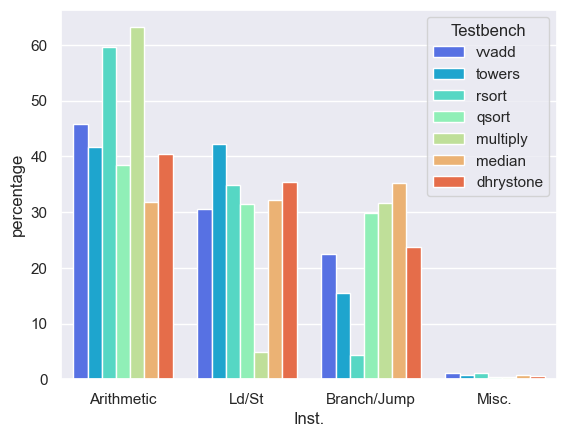

In [40]:
ddf = pd.DataFrame()
ddf['percentage'] = n_col1
ddf['Inst.'] = n_col2
ddf['Testbench'] = n_col3

sns.barplot(data=ddf, x='Inst.', y="percentage", hue = "Testbench",palette="rainbow")

In [41]:
df = pd.read_csv("1stage.csv")

# df = df.reset_index()  # make sure indexes pair with number of rows


for index, row in df.iterrows():
    tb = row["Testbench"]
    CPI_base = row["Arithmetic"] * 1 + row["Ld/St"]*2 + (row["Branch/Jump"] + row["Misc."]) * 1.5
    CPI_op = row["Arithmetic"] * 1 + row["Ld/St"]*1 + (row["Branch/Jump"] + row["Misc."]) * 1.5
    judge = "is" if CPI_op * 1.3 < CPI_base else "is NOT"
    print(f"The CPI for {tb} is {CPI_base/100} with 2-cycle load/store, and is {CPI_op/100} with 1-cycle load/store, and it {judge} worth it.")
    print()


The CPI for vvadd is 1.423475 with 2-cycle load/store, and is 1.117745 with 1-cycle load/store, and it is NOT worth it.

The CPI for towers is 1.5024899999999999 with 2-cycle load/store, and is 1.08052 with 1-cycle load/store, and it is worth it.

The CPI for rsort is 1.3764499999999997 with 2-cycle load/store, and is 1.02775 with 1-cycle load/store, and it is worth it.

The CPI for qsort is 1.4654449999999999 with 2-cycle load/store, and is 1.150735 with 1-cycle load/store, and it is NOT worth it.

The CPI for multiply is 1.20866 with 2-cycle load/store, and is 1.1598300000000001 with 1-cycle load/store, and it is NOT worth it.

The CPI for meidan is 1.50151 with 2-cycle load/store, and is 1.18004 with 1-cycle load/store, and it is NOT worth it.

The CPI for dhrystone is 1.47474 with 2-cycle load/store, and is 1.1215000000000002 with 1-cycle load/store, and it is worth it.



In [42]:
df = pd.read_csv("5stage_bypassed.csv")
df

,Testbench,Arithmetic,Ld/St,Branch/Jump,Misc.,CPI
0,vvadd,47.472,29.460,21.926,1.142,1.352
1,towers,42.544,41.935,14.780,0.742,1.250
2,rsort,59.661,34.844,4.340,1.115,1.083
3,qsort,38.448,31.403,29.826,0.323,1.421
4,multiply,63.791,4.238,31.619,0.352,1.565
5,meidan,32.470,31.405,35.278,0.847,1.469
6,dhrystone,40.531,35.198,23.725,0.546,1.323


(1.0, 1.7)

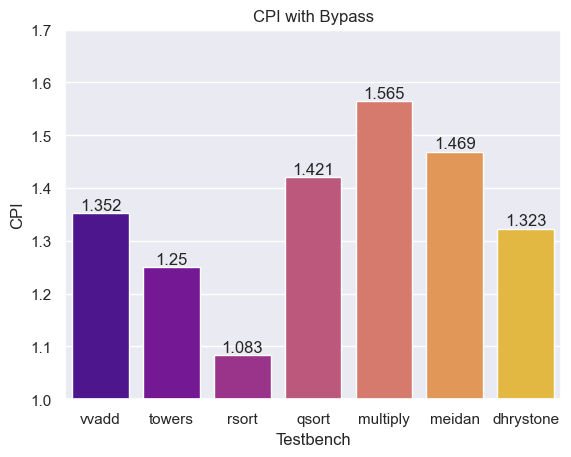

In [43]:
ax = sns.barplot(data=df, x="Testbench", y="CPI", palette="plasma")
for i in ax.containers:
    ax.bar_label(i,)
ax.set(title="CPI with Bypass")
ax.set_ylim(1,1.7)

In [58]:
df = pd.read_csv("5stage_NOT_bypassed.csv")
df

,Testbench,Arithmetic,Ld/St,Branch/Jump,Misc.,CPI
0,vvadd,47.472,29.460,21.926,1.142,1.839
1,towers,42.544,41.935,14.780,0.742,1.672
2,rsort,59.661,34.844,4.340,1.115,2.323
3,qsort,38.448,31.403,29.826,0.323,1.935
4,multiply,63.791,4.238,31.619,0.352,1.910
5,meidan,32.470,31.405,35.278,0.847,1.888
6,dhrystone,40.531,35.198,23.725,0.546,1.986


(1.5, 2.5)

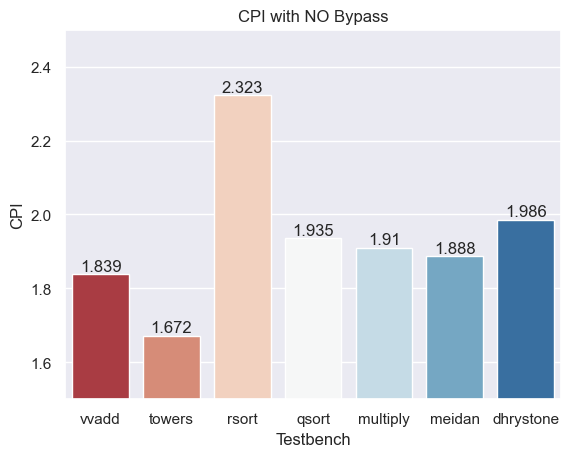

In [59]:
ax = sns.barplot(data=df, x="Testbench", y="CPI", palette="RdBu")
for i in ax.containers:
    ax.bar_label(i,)
ax.set(title="CPI with NO Bypass")
ax.set_ylim(1.5,2.5)

In [73]:
df_y = pd.read_csv("5stage_bypassed.csv")
df_n = pd.read_csv("5stage_NOT_bypassed.csv")
df_big = pd.concat([df_y["Testbench"],df_y["CPI"], df_n["CPI"]], axis=1)

# df = df.reset_index()  # make sure indexes pair with number of rows

for index, row in df_big.iterrows():
    tb = row["Testbench"]
    CPI_bypassed = row[1] * 1
    CPI_no = row[2] * 1 
    judge = "is" if CPI_bypassed * 1.25 < CPI_no else "is NOT"
    print(f"The CPI for {tb} is {CPI_no} with NO bypass, and is {CPI_bypassed} with bypass, and it {judge} worth it.")
    print()
df_big

The CPI for vvadd is 1.839 with NO bypass, and is 1.352 with bypass, and it is worth it.

The CPI for towers is 1.672 with NO bypass, and is 1.25 with bypass, and it is worth it.

The CPI for rsort is 2.323 with NO bypass, and is 1.083 with bypass, and it is worth it.

The CPI for qsort is 1.935 with NO bypass, and is 1.421 with bypass, and it is worth it.

The CPI for multiply is 1.91 with NO bypass, and is 1.565 with bypass, and it is NOT worth it.

The CPI for meidan is 1.888 with NO bypass, and is 1.469 with bypass, and it is worth it.

The CPI for dhrystone is 1.986 with NO bypass, and is 1.323 with bypass, and it is worth it.



,Testbench,CPI,CPI
0,vvadd,1.352,1.839
1,towers,1.250,1.672
2,rsort,1.083,2.323
3,qsort,1.421,1.935
4,multiply,1.565,1.910
5,meidan,1.469,1.888
6,dhrystone,1.323,1.986


(100.0, 120.0)

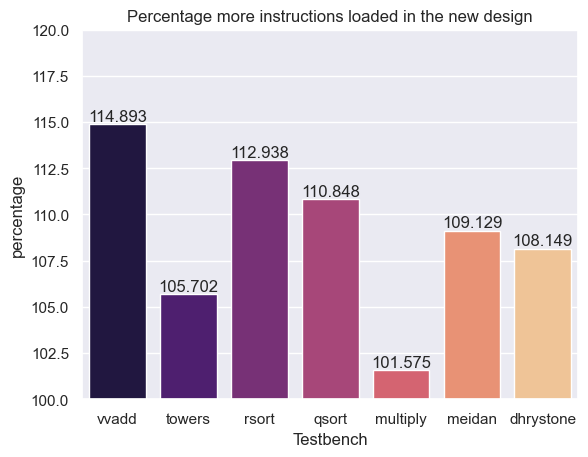

In [79]:
df_n = pd.read_csv("5stage_NOT_bypassed.csv")
df_n["percentage"] = df_n["cool"] + 100

ax = sns.barplot(data=df_n, x="Testbench", y="percentage", palette="magma")
for i in ax.containers:
    ax.bar_label(i,)
ax.set(title="Percentage more instructions loaded in the new design")
ax.set_ylim(100,120)

'\\begin{tabular}{llrrrr}\n & Testbench & nonzeroload & zeroload & nonzerostore & zerostore \\\\\n0 & vvadd & 20.018000 & 51.952000 & 7.837000 & 20.194000 \\\\\n1 & towers & 38.334000 & 13.483000 & 36.945000 & 11.238000 \\\\\n2 & rsort & 23.176000 & 35.594000 & 14.427000 & 26.803000 \\\\\n3 & qsort & 42.052000 & 34.585000 & 12.995000 & 10.368000 \\\\\n4 & multiply & 27.523000 & 40.479000 & 16.494000 & 15.505000 \\\\\n5 & meidan & 47.562000 & 29.420000 & 5.198000 & 17.821000 \\\\\n6 & dhrystone & 39.140000 & 23.215000 & 29.135000 & 8.510000 \\\\\n\\end{tabular}\n'

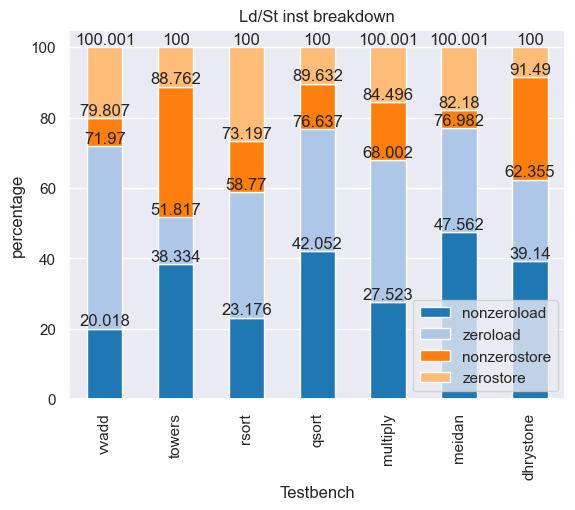

In [123]:
df_n = pd.read_csv("5stage_NOT_bypassed.csv")
df_plot = df_n[["Testbench","nonzeroload","zeroload","nonzerostore","zerostore"]]
# df_plot = df_[["Testbench", "zero index", "non-zero index"]]
sns.set_palette("tab20")
ax = df_plot.set_index('Testbench').plot(kind='bar', stacked=True)
ax.set(title = "Ld/St inst breakdown", ylabel = "percentage")
for i in ax.containers:
    ax.bar_label(i,)
df_plot.style.to_latex()

In [121]:
for index, row in df_n.iterrows():
    tb = row["Testbench"]
    ldst = row["Ld/St"]
    nonzero = row["nonzeroload"] + row["nonzerostore"]
    inc = (ldst * nonzero / 100)
    print(f"The percentage increase in instruction counts for {tb} is {inc:.3f}%")
    print()

The percentage increase in instruction counts for vvadd is 8.206%

The percentage increase in instruction counts for towers is 31.568%

The percentage increase in instruction counts for rsort is 13.102%

The percentage increase in instruction counts for qsort is 17.286%

The percentage increase in instruction counts for multiply is 1.865%

The percentage increase in instruction counts for meidan is 16.569%

The percentage increase in instruction counts for dhrystone is 24.031%

